# RESEAU DE NEURONE SIMPLE

In [1]:
#auteur I.CHELIKH 3704957

import time
import numpy as np
np.random.seed(123)  


from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution2D, MaxPooling2D, Input

Using TensorFlow backend.


In [2]:
#chargement et mise en forme des données pour le réseau de neurones

X_train, X_test, y_train, y_test = np.load('data.npy', allow_pickle = True)
print(np.shape(X_train))
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 

(1875, 12, 12)


In [0]:
#reutilisation d'une fonction d'affichage de résultats du TP7 
def affiche(history): 
  # summarize history for accuracy 
  plt.plot(history.history['accuracy']) 
  plt.plot(history.history['val_accuracy']) 
  plt.title('model accuracy') 
  plt.ylabel('accuracy') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.grid()
  plt.show() 
  # summarize history for loss 
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss']) 
  plt.title('model loss') 
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.grid()
  plt.show()

In [4]:
# Initialisation du réseau de neurone simple


inputs = Input(shape=(12,12)) 
x = inputs 
x=Flatten()(x) 
outputs=Dense(11, activation='softmax')(x) 
model_s = Model(inputs, outputs) 
model_s.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 12)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 11)                1595      
Total params: 1,595
Trainable params: 1,595
Non-trainable params: 0
_________________________________________________________________


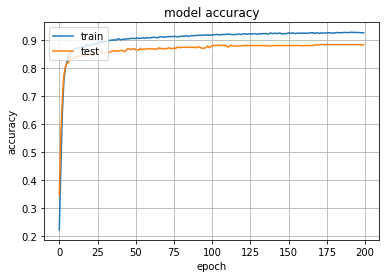

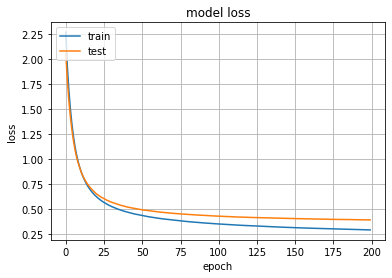

lr= 0.1 batch_size= 200 epochs= 200


In [5]:
# paramètres du réseau de neurones
lr=0.1
batch_size=200
epochs=200

# apprentissage du réseau avec SGD
sgd1=SGD(lr=lr)
model_s.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
history =model_s.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0,validation_data=(X_test, y_test)) 

# Affichage des résultats

affiche(history) 

print("lr=",lr,"batch_size=",batch_size, "epochs=",epochs) 




In [6]:
score = model_s.evaluate(X_test, y_test, verbose=0) # évaluation de la précision du modèle pour la base de test
print('Test accuracy:', score[1]*100, "%") 

Test accuracy: 88.31999897956848 %


# Réseau avec MLP

In [7]:
#même chose avec une couche de neurone cachée  de 64 neurones


inputs = Input(shape=(12,12)) 
x = inputs 
x=Flatten()(x) 
couche=Dense(64,activation='relu')(x)
outputs=Dense(11, activation='softmax')(couche) 
model_2 = Model(inputs, outputs) 
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12, 12)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                9280      
_________________________________________________________________
dense_2 (Dense)              (None, 11)                715       
Total params: 9,995
Trainable params: 9,995
Non-trainable params: 0
_________________________________________________________________


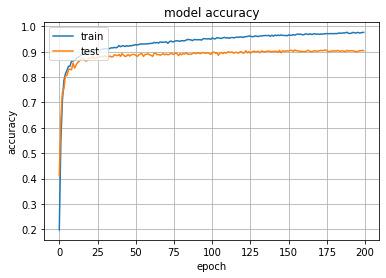

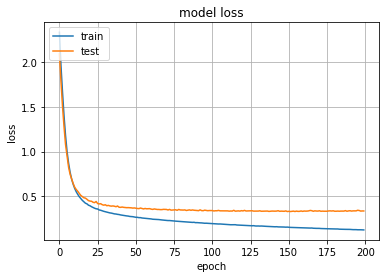

In [8]:
#paramètres réseau de neurones
lr=0.1 
batch_size=200
epochs=200
sgd1=SGD(lr=lr) #stochastic gradient descent with a fixed learning rate

#apprentissage
model_2.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 

history2 =model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                   verbose=0,validation_data=(X_test, y_test)) 


affiche(history2) 

In [9]:
score = model_2.evaluate(X_test, y_test, verbose=0) # évaluation de la précision du modèle pour la base de test
print('Test accuracy:', score[1]*100, "%") 

Test accuracy: 90.39999842643738 %


# Réseau avec CNN

In [0]:
# ajout CNN et dropout de 0.25 au réseau avec MLP avec dropout de 0.5
#X_train.reshape(1875,12,12)
#ajout d'une dimension ppur faire fonctionner la convolution
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print(X_train.shape)
print(X_test.shape) 

(1875, 12, 12, 1)
(625, 12, 12, 1)


In [19]:
#definition du réseau et des couches

inputs = Input(shape=(12,12,1)) 
x = inputs 

filtre1=Convolution2D(32,(3,3), activation='relu',padding='same')(x)

filtre2=Convolution2D(64,(3,3), activation='relu',padding='same')(filtre1)

dropout1=Dropout(0.25)(filtre2)
p= MaxPooling2D(pool_size=(2,2), strides=2,padding='same')(filtre2)
f=Flatten()(p) 

couche=Dense(128,activation='relu')(f)
dropout=Dropout(0.5)(couche)
outputs=Dense(11, activation='softmax')(dropout) 


model_cnn = Model(inputs, outputs) 
model_cnn.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 12, 12, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               295040    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0   

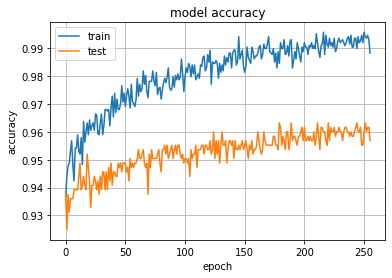

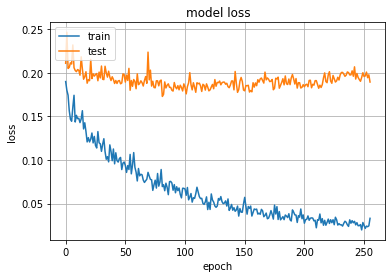

In [22]:
#paramètres réseau de neurones
lr=0.1 
batch_size=500
epochs=256
sgd1=SGD(lr=lr) #stochastic gradient descent with a fixed learning rate

#apprentissage
model_cnn.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 

history3 =model_cnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0,validation_data=(X_test, y_test)) 



affiche(history3) 

In [23]:
score = model_cnn.evaluate(X_test, y_test, verbose=0) # évaluation de la précision du modèle pour la base de test
print('Test accuracy:', score[1]*100, "%") 

Test accuracy: 95.67999839782715 %
